# 1. 就业行业

In [1]:
#就业行业有哪些？--词云
import pandas as pd
df1 = pd.read_csv("行业.csv")
df1.drop('Unnamed: 0', axis = 1, inplace = True)
df1

,Name
0,互联网/IT
1,金融
2,房地产/建筑
3,商业服务
4,贸易/批发/零售
5,教育/艺术
6,服务业
7,文化/传媒/娱乐
8,制造业
9,物流运输


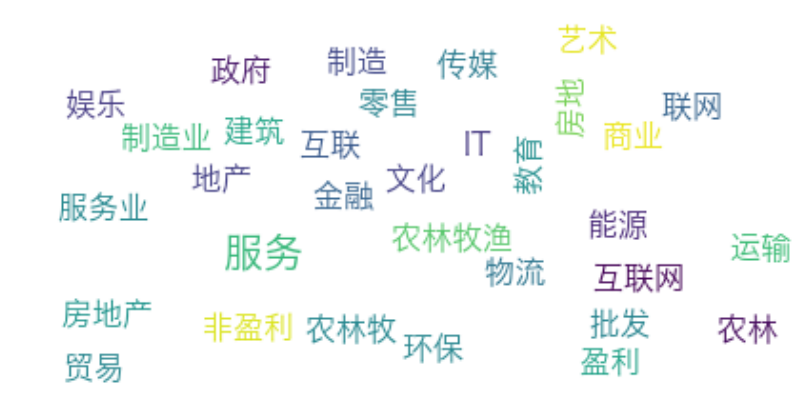

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

Name_list = df1['Name'].tolist()
Name_str = ' '.join(Name_list)

import jieba
cut = jieba.cut(Name_str)
lis = ' '.join(jieba.cut(Name_str,cut_all = True))
All_Comment = lis.split(' ')

#背景图

Comment_Word=[]
for i in All_Comment:
#    if i not in stop_words and len(i)>1:
    Comment_Word.append(i)
x=pd.Series(Comment_Word).value_counts().head(200)
wc = WordCloud(background_color="white",
               font_path = 'Hiragino Sans GB.ttc',
               max_words=2000,
               max_font_size=40, 
               random_state=40)
wc.generate_from_frequencies(x)
image_colors = ImageColorGenerator(coloring)
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('industry.png')

# 2. 毕业生就业去向——热门行业

In [92]:
#毕业生最关注的行业是？

import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": [43.33, 16.67, 10, 6.67, 6.67, 3.33, 3.33, 3.33, 3.33, 3.33],
      "labels": [
        "IT/Internet",
        "Network Equipment",
        "Energy/Environment Protection",
        "Marketing",
        "Education",
        "Service Industry",
        "Energy/Environment Protection",
        "Finacial Service",
        "Logistics",
        "Machine Manufacturing",
      ],
        "marker": {
        'colors': [
            'rgb(226,126,64)',
            'rgb(223,162,103)',
            'rgb(226,210,172)',
            'rgb(226,210,172)',
            'rgb(232,226,202)',
            'rgb(226,210,172)',
            'rgb(223,189,139)',
            'rgb(232,226,202)',
            'rgb(226,210,172)',
            'rgb(232,226,202)'
        ]
    },
      "domain": {"x": [0, .48]},
      "name": "GHG Emissions",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],

  "layout": {
        "title":"Top10 Hottest Sectors",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "TOP10",
                "x": 0.20,
                "y": 0.5
            }
            
        ]
    }
}
py.iplot(fig, filename='donut')

# 3. 毕业生就业去向（地区）

In [93]:
import pandas as pd
df = pd.read_csv("Region3.csv")
#df5.drop('Unnamed: 2', axis = 1, inplace = True)
df[0:10]

,Region,Ratio,Country,lat,long,cnt
0,Guangzhou,3.50%,China,23.129080,113.26436,30000.0
1,Chengdu,3.00%,China,30.670000,104.06000,26000.0
2,Beijing,2.60%,China,39.927289,116.44980,22000.0
3,Chongqing,2.55%,China,29.570000,106.55000,21000.0
4,Shenzhen,2.30%,China,22.542860,114.05956,20000.0
5,Zhengzhou,2.15%,China,34.750000,113.62000,17000.0
6,Shanghai,1.85%,China,31.188260,121.43687,16000.0
7,Changsha,1.80%,China,28.230000,112.93000,15500.0
8,Hangzhou,1.75%,China,30.280000,120.15000,15000.0
9,Guiyang,1.75%,China,26.650000,106.63000,14900.0


In [96]:
import plotly.plotly as py
import pandas as pd

df5.head()

df5['text'] = df5['Region'] + ',' + df5['Country'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'chn-states',
        lon = df5['long'],
        lat = df5['lat'],
        text = df5['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df['cnt'],
            cmax = df['cnt'].max(),
            colorbar=dict(
                title="Amount"
            )
        ))]

layout = dict(
        title = 'The Top10 City of Graduates want to work in',
        colorbar = True,
        geo = dict(
            scope='china',
            projection=dict( type='albers china' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

# 4. 为什么去这些行业？行业评价——互联网

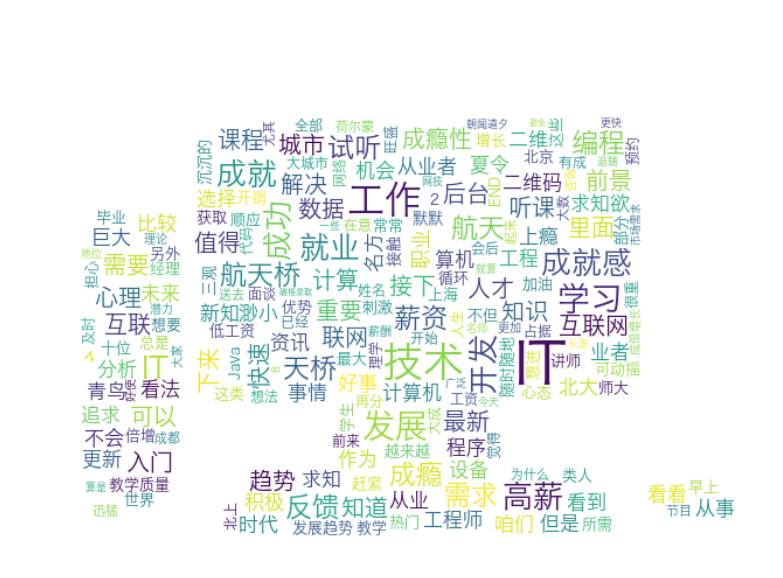

In [62]:
#互联网企业评价词云
import pandas as pd
df3 = pd.read_csv("互联网评价.csv")
df3.drop('Unnamed: 0', axis = 1, inplace = True)
Comment_list = df3['Comment'].tolist()
Comment_str = ' '.join(Comment_list)
Comment = Comment_str.replace('，','').replace('。','').replace('！','').replace('？','').replace('：','')
Comment

import jieba
#jieba.add_word('情感滤镜')
cut = jieba.cut(Comment)
lis = ' '.join(jieba.cut(Comment,cut_all = True))
All_Comment = lis.split(' ')

#背景图
coloring = np.array(Image.open('ciyun/333.jpg'))

#词云制作
Comment_Word=[]
stop_words = ["一个","自己","你们","来说","这个","因为","对于","而且","接下来","出现","为了","什么","正在","不断",
              "这样","就是","那么","问题","现在","不是","进入","然后","来看","了解","因此","还有","方式","行业","一种","更多",
             "多么","其他","不可","有着","平均","产生","一份","无论","我们","免费","没看","电话","报名","完全","夏令营","居然",
             "还是","也许","情况","地区"]
for i in All_Comment:
    if i not in stop_words and len(i)>1:
        Comment_Word.append(i)
x=pd.Series(Comment_Word).value_counts().head(200)
wc = WordCloud(mask = coloring,
               background_color="white",
               font_path = 'Hiragino Sans GB.ttc',
               max_words=2000,
               max_font_size=50, 
               random_state=40)
wc.generate_from_frequencies(x)
image_colors = ImageColorGenerator(coloring)
#plt.figure(figsize=(14, 7))
plt.figure(figsize=(30, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('itcomment.png')

# 4. 行业评价——传媒

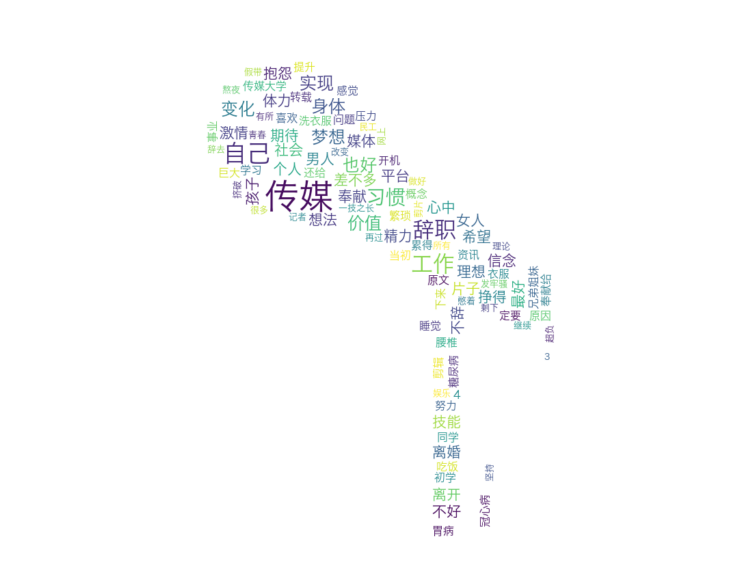

In [50]:
#传媒企业评价词云
import pandas as pd
df4 = pd.read_csv("传媒评价.csv")
df4.drop('Unnamed: 0', axis = 1, inplace = True)
Comment_list = df4['Comment'].tolist()
Comment_str = ' '.join(Comment_list)
Comment = Comment_str.replace('，','').replace('。','').replace('！','').replace('？','').replace('：','')
Comment

import jieba
#jieba.add_word('情感滤镜')
cut = jieba.cut(Comment)
lis = ' '.join(jieba.cut(Comment,cut_all = True))
All_Comment = lis.split(' ')

#背景图
coloring = np.array(Image.open('ciyun/7.jpeg'))

#词云制作
Comment_Word=[]
stop_words = ["一个","大概","部分","什么","为了","不多","只是","一口","抱有","这么","10","已经","我们",
             "一定","时候","白杨","出处","一定","有人","就算","这些","这个","时候","现在","这时候","应该","无法",
             "干嘛","同时","还是","因为","别的","总是","只能","没有","为啥","这里","开始","大部","而已","曾经","回答",
             "一部","大部分","3","4"]
for i in All_Comment:
    if i not in stop_words and len(i)>1:
        Comment_Word.append(i)
x=pd.Series(Comment_Word).value_counts().head(100)
wc = WordCloud(mask = coloring,
               background_color="white",
               font_path = 'Hiragino Sans GB.ttc',
               max_words=2000,
               max_font_size=50, 
               random_state=40)
wc.generate_from_frequencies(x)
image_colors = ImageColorGenerator(coloring)
#plt.figure(figsize=(14, 7))
plt.figure(figsize=(30, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('comcomment.png')

# 5. 这些行业平均薪资又是如何？

In [44]:
import pandas as pd
df = pd.read_csv("行业薪资.csv", encoding = 'utf-8')
#df5.drop('Unnamed: 2', axis = 1, inplace = True)
df[0:11]

,Task,Start,Finish,Resource
0,IT Service/Internet,4918.69,14481.70,IT Service/Internet
1,Financial Services,5568.24,7939.75,Financial Services
2,Real Estate Development/Construction and Engin...,6583.71,8565.83,Real Estate Development/Construction and Engin...
3,Service Industry,4852.07,7911.97,Service Industry
4,Media/Culture,4645.68,8626.54,Media/Culture
5,Manufaturing Industry,4947.01,7906.25,Manufaturing Industry
6,Energy/Environment Protection,5380.66,6482.60,Energy/Environment Protection
7,Education/Consultancy,5504.06,6376.09,Education/Consultancy
8,Human Resource,3956.41,8230.81,Human Resource
9,Project/Senior Management,4510.91,19470.30,Project/Senior Management


In [77]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = {"x": [4918.69, 5568.24, 6583.71, 4852.07, 4645.68, 4947.01, 5380.66, 5504.06, 3956.41, 4510.91, 6219.03], 
          "y": ['IT/Internet', 'Finance', 'Real Estate Development/Construction and Engineering',
           'Service Industry', 'Media/Culture', 'Manufaturing Industry',
           'Energy/Environment Protection', 'Education/Consultancy', 'Human Resource', 'Project/Senior Management'], 
          "marker": {"color": "rgba(204, 204, 204, 0.95)", "size": 12}, 
          "mode": "markers", 
          "name": "The lowest salary on average", 
          "type": "scatter"
}

trace2 = {"x": [14481.70, 7939.75, 8565.83, 7911.97, 8626.54, 7906.25, 6482.60, 6376.09, 8230.81, 19470.30, 11709.20], 
          "y": ['IT/Internet', 'Finance', 'Real Estate Development/Construction and Engineering',
           'Service Industry', 'Media/Culture', 'Manufaturing Industry',
           'Energy/Environment Protection', 'Education/Consultancy', 'Human Resource', 'Project/Senior Management'], 
          "marker": {"color": "rgba(156, 165, 196, 0.95)", "size": 12}, 
          "mode": "markers", 
          "name": "The highest salary on average", 
          "type": "scatter", 
}

data = [trace1, trace2]
layout = {"title": "Industry Average Wages Disparity", 
          "xaxis": {"title": "Average Salary (in thousands)", }}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filenmae='Industry_AverageWages_dot-plot')

# 6. 毕业生的起薪会受到学历影响吗?

In [3]:
import pandas as pd
df = pd.read_csv("Salary.csv")
df.drop('Unnamed: 4', axis = 1, inplace = True)
df[0:4]

,Educational Background,985,211,General
0,Junior college,3045.0,2804.0,2000.0
1,Bachelor degree,3865.0,3352.0,2428.0
2,Master degree,5088.0,4442.0,3246.0
3,Doctorate and etc.,6228.0,5623.0,4134.0


In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['Junior college', 'Bachelor degree', 'Master degree', 'Doctorate and etc.'],
    y=[3045, 3865, 5088, 6228],
    name='985',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=['Junior college', 'Bachelor degree', 'Master degree', 'Doctorate and etc.'],
    y=[2804, 3352, 4442, 5623],
    name='211',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace3 = go.Bar(
    x=['Junior college', 'Bachelor degree', 'Master degree', 'Doctorate and etc.'],
    y=[2000, 2428, 3246,4134],
    name='General',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)'
    )
)

data = [trace3, trace2, trace1]
layout = go.Layout(
    barmode='relative',
    title='Graduate Starting Salary: Classification of Education Background',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
    title='Salary',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Graduate Starting Salary')

In [19]:
#第二种
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['Junior college', 'Bachelor degree', 'Master degree', 'Doctorate and etc.'],
    y=[1045, 1437, 5088, 6228],
    name='985',
    text = 'Starting salary:3045',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=['Junior college', 'Bachelor degree', 'Master degree', 'Doctorate and etc.'],
    y=[804, 924, 4442, 5623],
    name='211',
    text = 'Starting salary:2804',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace3 = go.Bar(
    x=['Junior college', 'Bachelor degree', 'Master degree', 'Doctorate and etc.'],
    y=[2000, 2428, 3246,4134],
    text = 'Starting salary:2000',
    name='General',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)'
    )
)

data = [trace3, trace2, trace1]
layout = go.Layout(
    barmode='relative',
    title='Graduate Starting Salary: Classification of Education Background',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
    title='Salary',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Graduate Starting Salary')